In [69]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [70]:
np.random.seed(42)

In [71]:
customer_age = np.random.randint(18, 65, 100)

In [72]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [73]:
purchase_prob = sigmoid((customer_age - 40) / 5)
purchase_decision = np.random.binomial(1, purchase_prob)

In [74]:
data = pd.DataFrame({
    'Customer_Age': customer_age,
    'Purchase_Decision': purchase_decision
})

In [75]:
data.to_csv('business_logistic_regression_dataset.csv', index=False)

print("Dataset saved as 'business_logistic_regression_dataset.csv'")

Dataset saved as 'business_logistic_regression_dataset.csv'


In [76]:
df = pd.read_csv('business_logistic_regression_dataset.csv')
df.head()

,Customer_Age,Purchase_Decision
0,56,1
1,46,1
2,32,0
3,60,1
4,25,0


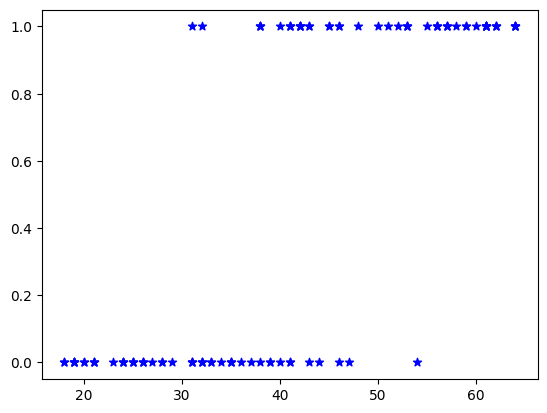

In [77]:
plt.scatter(df.Customer_Age, df.Purchase_Decision, marker='*', color='blue')

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train, X_test, y_train, y_test = train_test_split(df[['Customer_Age']], df.Purchase_Decision, train_size=0.8, random_state=42)

In [80]:
X_test

,Customer_Age
83,35
53,61
70,51
45,31
44,42
39,38
22,19
80,38
10,28
0,56


In [81]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [82]:
model.fit(X_train, y_train)

LogisticRegression()

In [83]:
X_test

,Customer_Age
83,35
53,61
70,51
45,31
44,42
39,38
22,19
80,38
10,28
0,56


In [84]:
y_pred = model.predict(X_test)

In [85]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)

In [86]:
accuracy

0.75

In [87]:
X_test

,Customer_Age
83,35
53,61
70,51
45,31
44,42
39,38
22,19
80,38
10,28
0,56


In [88]:
from sklearn.metrics import confusion_matrix

In [89]:
cm = confusion_matrix(y_test,y_pred)

In [90]:
cm

array([[8, 1],
       [4, 7]])

In [91]:
import seaborn as sns

Text(58.222222222222214, 0.5, 'Truth')

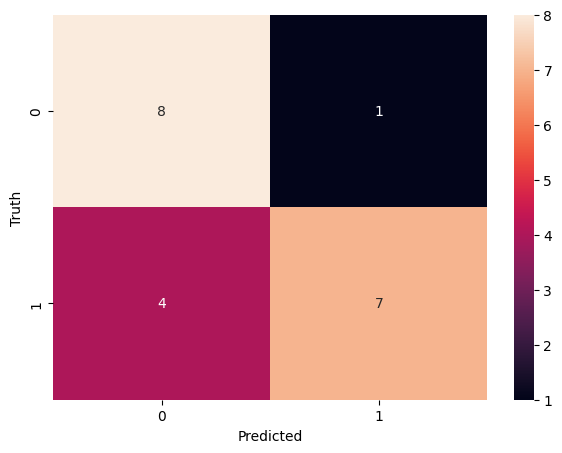

In [92]:
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [93]:
from sklearn.metrics import classification_report

In [94]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.89      0.76         9
           1       0.88      0.64      0.74        11

    accuracy                           0.75        20
   macro avg       0.77      0.76      0.75        20
weighted avg       0.78      0.75      0.75        20



In [95]:
# Get weight (w) and bias (b)
w = model.coef_[0][0]  # Slope
b = model.intercept_[0]  # Intercept

In [96]:
w

0.24738275578989433

In [97]:
b

-10.265394984499684

In [98]:
# Prediction Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [99]:
def predict_probability(age):
    z = w * age + b
    probability = sigmoid(z)
    return probability

In [100]:
df.sample()

,Customer_Age,Purchase_Decision
46,26,0


In [101]:
age_to_predict = 40
probability = predict_probability(age_to_predict)

In [102]:
probability

0.4085205424364033